## Calculating Descriptive Statistics

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5,math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central

### Mean

In [4]:
mean_ = sum(x)/len(x)
mean_

8.7

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
mean_ = np.mean(y)
mean_

8.7

In [8]:
type(y)

numpy.ndarray

In [9]:
mean_ = y.mean()
mean_

8.7

In [10]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


mengabaikan nilai nan

In [11]:
np.nanmean(y_with_nan)

8.7

pd.Series objects juga mempunyai method .mean()

In [12]:
type(z)

pandas.core.series.Series

In [13]:
mean_ = z.mean()
mean_

8.7

mean() dari pandas mengabaikan nilai nan secara default:

In [14]:
z_with_nan.mean()

8.7

In [15]:
z_with_nan.mean(skipna=True)

8.7

### Weighted Mean

In [16]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [18]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean1 = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean1)

wmean2 = sum(x_ * w_ for (x_, w_) in zip (x, w)) / sum(w)
print(wmean2)

6.95
6.95


In [19]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


hasilnya sama dengan kasus implementasi Python pure. metode ini juga dapat digunakan pada list dan tuples.

solusi lain adalah dengan menggunakan element-wise produc w * y dengan np.sum() atau sum()

In [20]:
(w * y).sum() / w.sum()

6.95

### Harmonic Mean

salah satu varian dari implementasi Python pure dari harmonic mena adalah di bawah ini:

In [21]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

library harmonic mean

In [22]:
scipy.stats.hmean(y)

2.7613412228796843

In [23]:
scipy.stats.hmean(z)

2.7613412228796843

### Geometric Mean

In [24]:
gmean = 1

for item in x:
    gmean *= item
    
gmean **= 1/ len(x)
gmean

4.677885674856041

kita juga bisa mendapatkan geometric mean dengan cipy.stats.gmean ():

In [25]:
scipy.stats.gmean(y)

4.67788567485604

In [26]:
scipy.stats.gmean(z)

4.67788567485604

### Median

In [27]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
    
median_

4

In [28]:
x

[8.0, 1, 2.5, 4, 28.0]

In [29]:
statistics.median_low(x[:-1])

2.5

In [30]:
statistics.median_high(x[:-1])

4

In [31]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [32]:
median_ = np.median(y)
print(median_)

4.0


In [33]:
median_ = np.median(y[:-1])
print(median_)

3.25


### Mode

In [34]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [35]:
mode_ = statistics.mode(u)
mode_

2

In [36]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

C:\Users\hp\AppData\Local\Temp\ipykernel_12856\3259432411.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(u)


ModeResult(mode=array([2]), count=array([2]))

In [37]:
mode_ = scipy.stats.mode(v)
mode_

C:\Users\hp\AppData\Local\Temp\ipykernel_12856\4273125489.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(v)


ModeResult(mode=array([12]), count=array([3]))

In [38]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [39]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


### Measures of Variability

**Menghitung sample variance with Python pure:**

In [40]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n-1)
var_

123.19999999999999

fungsi yang lebih singkat dan lebih elegan dengan memanggil funsi statistics.variance()

In [41]:
var_ = statistics.variance(x)
var_

123.2

menggunakan nummpy dengan fungsi np.var() atau method .var():

In [42]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [43]:
var_ = y.var(ddof=1)
var_

123.19999999999999

Objek pd.Series memiliki metodw .var() yang mengabaikan nilai nan secara default:

In [44]:
z.var(ddof = 1)

123.19999999999999

### Standard Deviation

In [45]:
std_ = var_**0.5
std_

11.099549540409285

In [46]:
std_ = statistics.stdev(x)
std_

11.099549540409287

untuk mengabaikan nilai nan, menggunakan np.nanstd()

In [47]:
np.std(y, ddof=1)

11.099549540409285

In [48]:
y.std(ddof=1)

11.099549540409285

Objek pd.Series memiliki method .std() yang mengabaikan nan secara default:

In [49]:
z.std(ddof=1)

11.099549540409285

### Skewness

In [50]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n-1) * (n-2) * std_**3))

In [51]:
skew_

1.9470432273905929

Menghitung skewness dengan scipy.stats.skew():

In [52]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [53]:
scipy.stats.skew(y_with_nan, bias=False)

nan

Objek Pandas Series memiliki metode .skew() yang mengembalikan skewness kumpulan data:

In [54]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [55]:
z_with_nan.skew()

1.9470432273905924

### Precentiles

In [56]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [57]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

menggunakan np.precentile() untuk menentukan persentil sampel apapun dalam kumpulan data, misalnya persentil ke-5 dan ke-95:

In [58]:
y = np.array(x)
np.percentile(y, 5)

-3.44

In [59]:
np.percentile(y, 95)

34.919999999999995

Persenti bisa berupa angka antara 0 dan 100, tetapi juga bisa berupa urutan angka:

In [60]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [61]:
np.median(y)

8.0

jika ingin mengabaikan nan, gunakan np.nanpercentile90 sebagai gantinya:

In [62]:
y_with_nan = np.insert(y, 2, np.nan)

y_with_nan


array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [63]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [64]:
y

array([-5. , -1.1,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [65]:
np.quantile(y, 0.05)

-3.44

In [66]:
np.quantile(y, 0.95)

34.919999999999995

In [67]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [68]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [69]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [70]:
z.quantile(0.95)

34.919999999999995

In [71]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [72]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

### Ranges

menggunakan fungsi np.ptp():

In [73]:
y

array([-5. , -1.1,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [74]:
print(np.ptp(y))
print(np.ptp(z))

46.0
46.0


In [75]:
print(np.ptp(y_with_nan))
print(np.ptp(z_with_nan))

nan
nan


In [76]:
np.ptp(z_with_nan)

nan

fungsi dan method python, NumPy, atau Pandas bawaan untuk menghiyung maksimum dan minimum:
* max() and min() from the Python standard library
* amx() and amin() from NumPy
* nanmax() and nanmin() from NumPy to ignore nan values
* .max() and .min() from NumPy
* .max() and .min() from Pandas to ignore nan values by default

In [78]:
print(np.amax(y) - np.amin(y))
print(np.nanmax(y_with_nan) - np.nanmin(y_with_nan))
print(y.max() - y.min())
print(z.max() - z.min())
print(z_with_nan.max() - z_with_nan.min())

46.0
46.0
46.0
46.0
46.0


Interquatile range adalah perbedaan anatara kuartil pertama dan ketiga. setelah menghitung kuartil bia mengambil selisihnya:

In [79]:
quartiles = np.quantile(y,  [0.25, 0.75])
quartiles[1] - quartiles[0]
                             

20.9

In [83]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

#### Summary of Descriptive Statistics

In [85]:
y

array([-5. , -1.1,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [84]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

describe() mengebalikan obkel yang berupa descriptive statistics berikut:
* nobs: the number of observations or elements in dataset
* minmax: the tuple with the mimimum and maximum values of your datset
* mean: the mean of your dataset
* varieance: the variance of datset
* skewness: the skewness of dataset
* kurtosis: the kurtosis of datset

In [89]:
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [86]:
result.nobs

9

In [87]:
result.minmax[0]

-5.0

In [88]:
result.minmax[1]

41.0

In [90]:
result.variance

228.75194444444446

In [91]:
result.skewness

0.9249043136685094

In [92]:
result.kurtosis

0.14770623629658886

In [93]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

Mengembalikan Series baru yang menampung nilai berikut:
* count: the number of elements in dataset
* mean: the mean of your dataset
* std: the standard deviation of your dataset
* min and max: the minimum and maximum values of datset
* 25%, 50%, and 75%: the quartiles of your dataset

In [95]:
result['mean']

11.622222222222222

In [97]:
result['std']

15.12454774346805

In [98]:
result['min']

-5.0

In [99]:
result['25%']

0.1

In [100]:
result['50%']

8.0

In [101]:
result['75%']

21.0

#### Measures of Correlation Between Pairs of Data

**Measures of correlation** antara pasangan data:
* **Positive correlation** exits when larger values of x correspond to larger values of y and vice versa.
* **Negative correaltion** exits when larger values of x correspond to smaller values of y and vice versa.
* **Weak or no correlation exits** if there is no such apparent relationship.

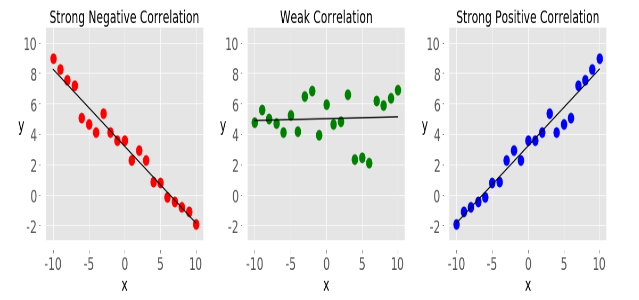

Dua statistik yang mengukur korelasi antar dataset adalah **covariance** dan **correlation coefficient**.

In [102]:
x = list(range(-10, 11))
y = [0,2,2,2,2,3,3,6,7,4,7,6,6,9,4,5,5,10,11,12,14]
x_, y_ = np.array(x), np.array(y)
x_, y_ = pd.Series(x_), pd.Series(y_)
         

### Covariance

**Sample covariance** adalah ukuran yang mengukur kekuatan dan arah hubungan antara sepasang variabel:
* **If the correlation is positive**, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
* **If the correlation is negative**, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
* **If the correlation is weak**, then the covariance is close to zero.

Menghitung kovarian dengan Python pure:

In [107]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n-1))

cov_xy

19.95

fungsi cov() mengembalikan **covariance matrix**:

In [109]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [111]:
x_.var(ddof=1)

38.5

In [112]:
y_.var(ddof=1)

13.914285714285711

dilihat bahwa, variansi dari x dan y sama dengan cov_matrix[0, 0] dan cov_matrix[1, 1].

Dua elemen lain dari covariance matrix adalah sama dan mewakili covariance aktual x dan y:

In [113]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [114]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

nilai kovarian yang sama dengan np.cov() seperti pada Python pure:
    
Series Pandas memiliki metode .cov() yang dapat digunakan untuk mengitung kovarian;

In [117]:
cov_xy = x_.cov(y_)
cov_xy

19.95

In [118]:
cov_xy = y_.cov(x_)
cov_xy

19.95

### Correlation Coefficient

**Correlation coefficient**, atau **Pearson product-moment correlation coefficient**, dilambangkan dengan simbol 𝑟. Coefficient  adalah ukuran lain dari korelasi antar data. Kita dapat menganggapnya sebagai standardized covariance. Berikut beberapa infonya:
* **The value 𝑟 > 0** indicates positive correlation.
* **The value 𝑟 < 0** indicates negative correlation.
* **The value r = 1** is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
* **The value r = −1** is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
* **The value r ≈ 0**, or when 𝑟 is around zero, means that the correlation between variables is weak.

In [119]:
var_x = sum((item - mean_x)**2 for item in x) / (n-1)
var_y = sum((item - mean_y)**2 for item in y) / (n-1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

variabel r yang mewakili correlation coefficient.

scipy.stats memiliki pearsonr() yang menghitung correlation coefficient dan the *p*-value:

In [121]:
r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316061

In [122]:
p

5.122760847201132e-07

pearsonr() mengembalikan tuple dengan dua angka. Yang pertama adalah r dan kedua adalah *p*-value.

Mirip dengan kasus covariance matrix, np.corrcoef() dapat diterapkan dengan x_ dan y_ sebagai argumen dan mendapatkan **correlation coefficient matrix**:

In [123]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [125]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [126]:
r = corr_matrix[1, 0]
r

0.861950005631606

correlation coefficient dengan scipy.stats.linregress():

In [128]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [129]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [131]:
r = x_.corr(y_)
r

0.8619500056316061

In [132]:
r = y_.corr(x_)
r

0.861950005631606